In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crop=pd.read_csv('crop_production.csv')

In [3]:
crop[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


Data Exploration

In [4]:
crop.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [5]:
#Dropping the null values
data=crop.dropna()
print(data.shape)
test=crop[~crop["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(242361, 7)
(3730, 6)


In [6]:
#Getting all columns data.
for i in data.columns:
    print("column name :",i)
    print("No. of column :",len(data[i].unique()))
    print(data[i].unique())

column name : State_Name
No. of column : 33
['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
column name : District_Name
No. of column : 646
['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG

In [7]:
sum_maxp=data["Production"].sum()
data["percent_of_production"]=data["Production"].map(lambda x: (x/sum_maxp)*100)

C:\Users\Prabhjyot Singh\AppData\Local\Temp\ipykernel_7224\2942383637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["percent_of_production"]=data["Production"].map(lambda x: (x/sum_maxp)*100)


In [8]:
data[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07


Data Visulization

<Axes: xlabel='Crop_Year', ylabel='Production'>

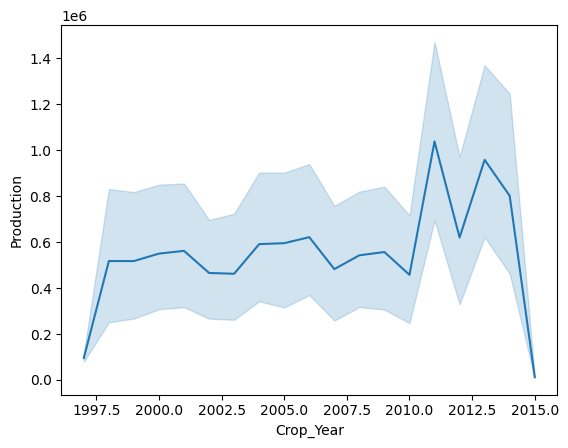

In [9]:
sns.lineplot(x=data["Crop_Year"], y=data["Production"]) #Production of crops over the years

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

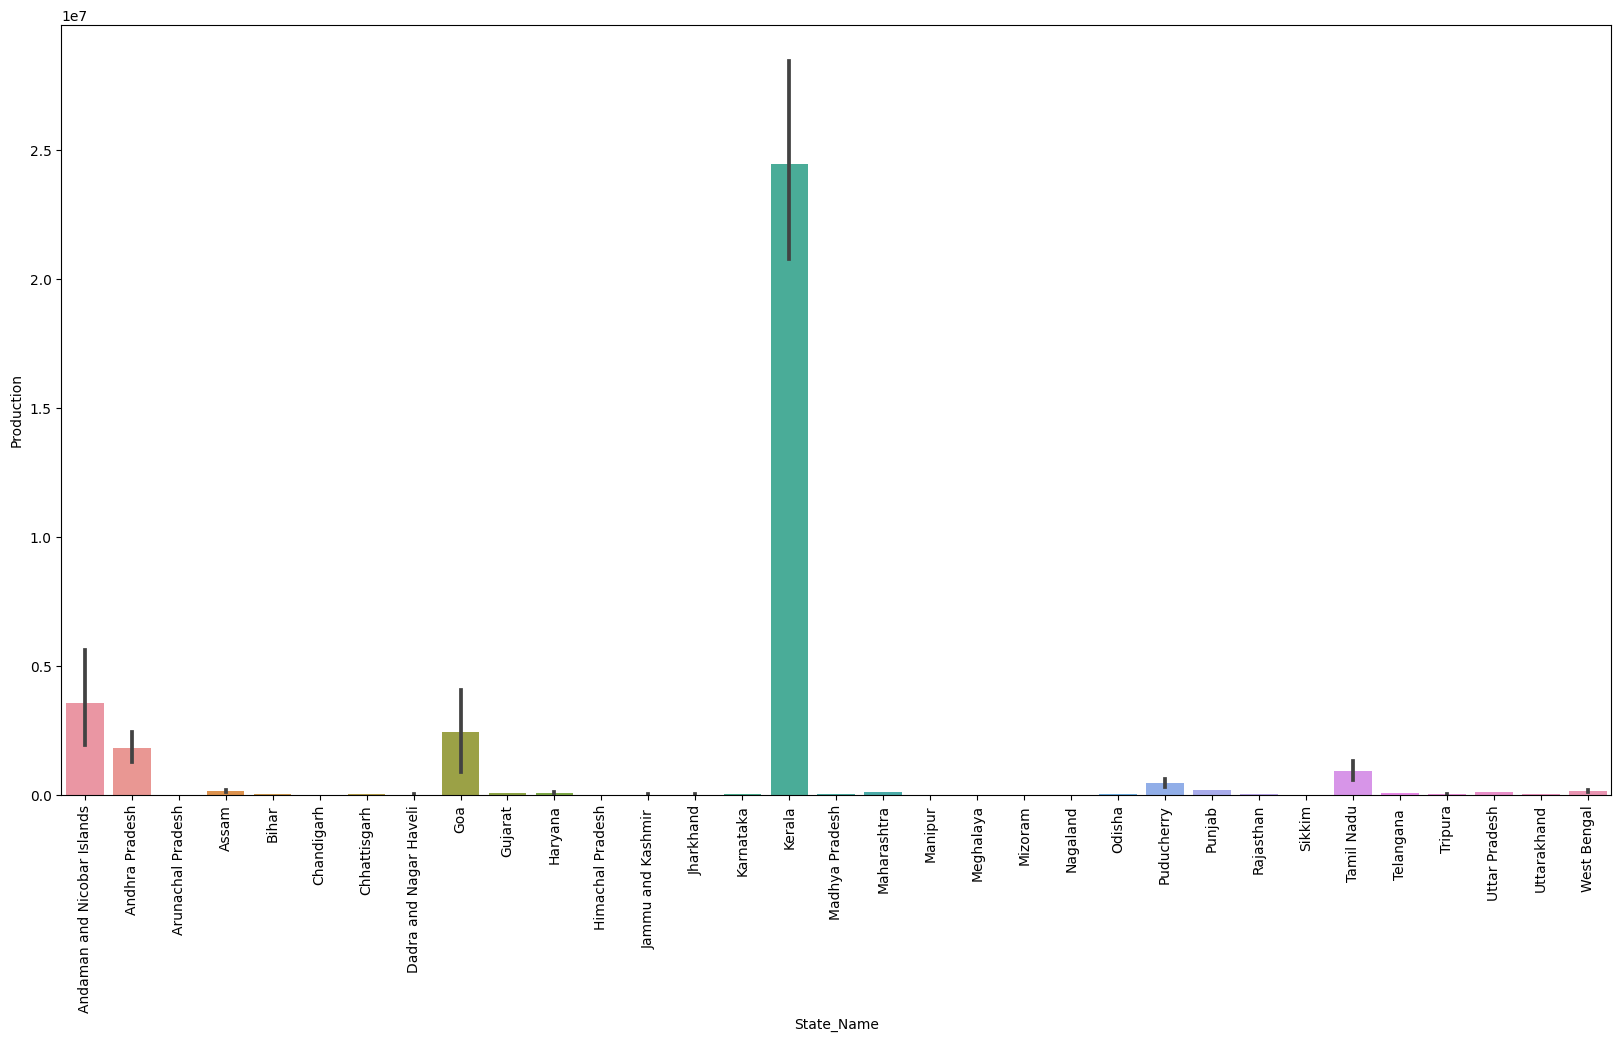

In [10]:
plt.figure(figsize=(20,10))
sns.barplot(x=data["State_Name"], y=data["Production"]) #Production of crops in different states
plt.xticks(rotation=90)#rotating the xticks to 90 degrees for better visibility of the states name on x-axis

In [11]:
# sns.jointplot(x=data["Area"], y=data["Production"], kind="reg") #Production of crops in different states

Exploratory Analysis and Visualization

Few major crops are:
    Rice, Wheat, Suagrcane, Peas & beans(Pulses), Tomato, Bajra, Turmeric. So, we try to analyse the product stats, which district is producing more of which product, which state is producing more of which product, etc.

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 7
matplotlib.rcParams['figure.facecolor'] = '#ffffff'
matplotlib.rcParams['figure.figsize'] = (10, 6)

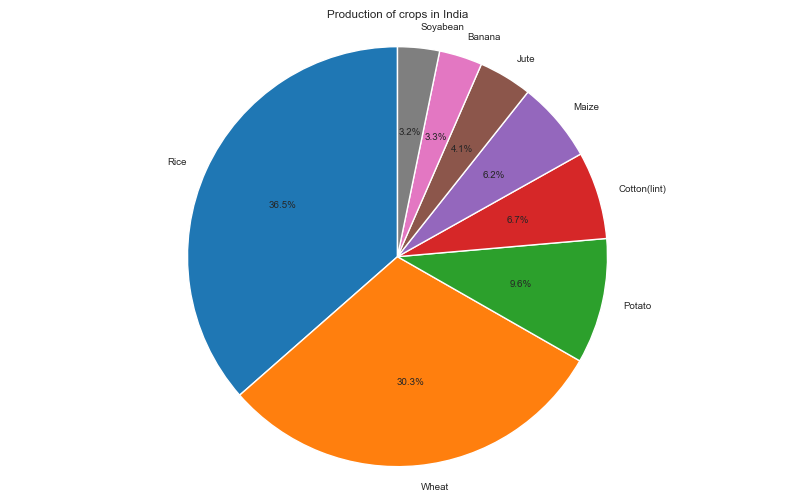

In [13]:
new_df=crop.groupby("Crop")["Production"].sum().reset_index()
sorted_prod=new_df.sort_values(by="Production",ascending=False)
sorted_prod

plot_pie=sorted_prod[2:10]
# plot_pie

crop_name=plot_pie["Crop"].tolist()
production_values=plot_pie["Production"].tolist() # convert Series to list

plt.pie(production_values,labels=crop_name,autopct='%1.1f%%',shadow=False, startangle=90)
plt.title("Production of crops in India")
plt.axis('equal')
plt.show()


In [15]:
top_10_crop=data.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False)[1:11]
top_10_crop

,Crop,Production
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08
33,Cotton(lint),2.970000e+08
59,Maize,2.733418e+08
49,Jute,1.815582e+08
7,Banana,1.461327e+08
105,Soyabean,1.418372e+08
6,Bajra,1.296810e+08


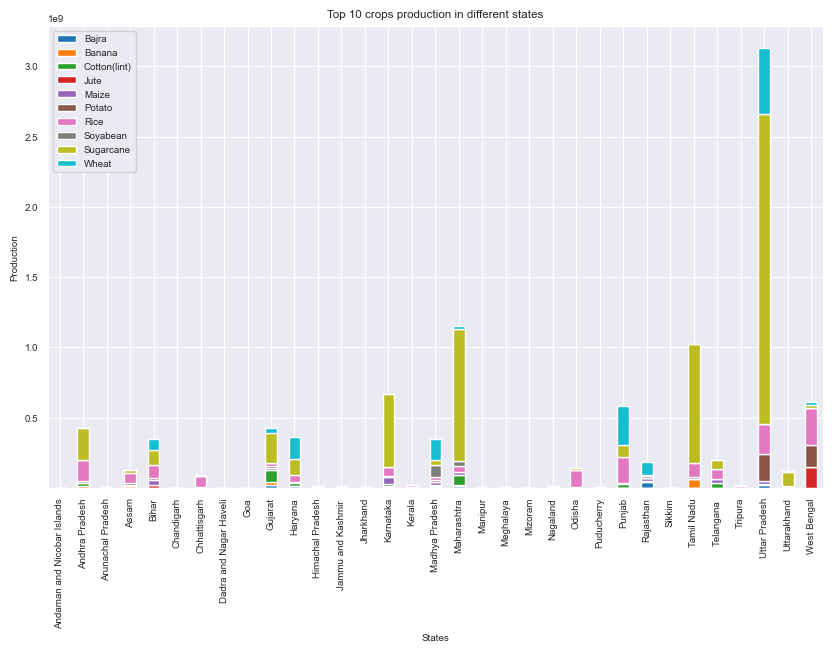

In [17]:
grouped_data=crop.groupby(["State_Name","Crop"])["Production"].sum().reset_index()
top_10_crop=grouped_data[grouped_data["Crop"].isin(top_10_crop["Crop"])]
pivot_data=top_10_crop.pivot(index="State_Name",columns="Crop",values="Production")
pivot_data.plot(kind="bar",stacked=True,figsize=(10,6))
plt.title("Top 10 crops production in different states")
plt.xlabel("States")
plt.ylabel("Production")

plt.legend()
plt.show()


In [19]:
wheat_data=data[data["Crop"]=="Wheat"]

In [20]:
wheat_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
230,Andhra Pradesh,ANANTAPUR,1997,Rabi,Wheat,300.0,200.0,1.416670e-07
255,Andhra Pradesh,ANANTAPUR,1998,Rabi,Wheat,400.0,200.0,1.416670e-07
284,Andhra Pradesh,ANANTAPUR,1999,Rabi,Wheat,439.0,294.0,2.082505e-07
326,Andhra Pradesh,ANANTAPUR,2000,Rabi,Wheat,520.0,297.0,2.103755e-07
372,Andhra Pradesh,ANANTAPUR,2001,Rabi,Wheat,307.0,213.0,1.508754e-07
...,...,...,...,...,...,...,...,...
245949,West Bengal,PURULIA,2010,Rabi,Wheat,2013.0,5152.0,3.649342e-06
245980,West Bengal,PURULIA,2011,Rabi,Wheat,1880.0,4206.0,2.979257e-06
246012,West Bengal,PURULIA,2012,Rabi,Wheat,1648.0,3310.0,2.344589e-06
246047,West Bengal,PURULIA,2013,Rabi,Wheat,1187.0,2675.0,1.894796e-06


<Axes: xlabel='Season', ylabel='Production'>

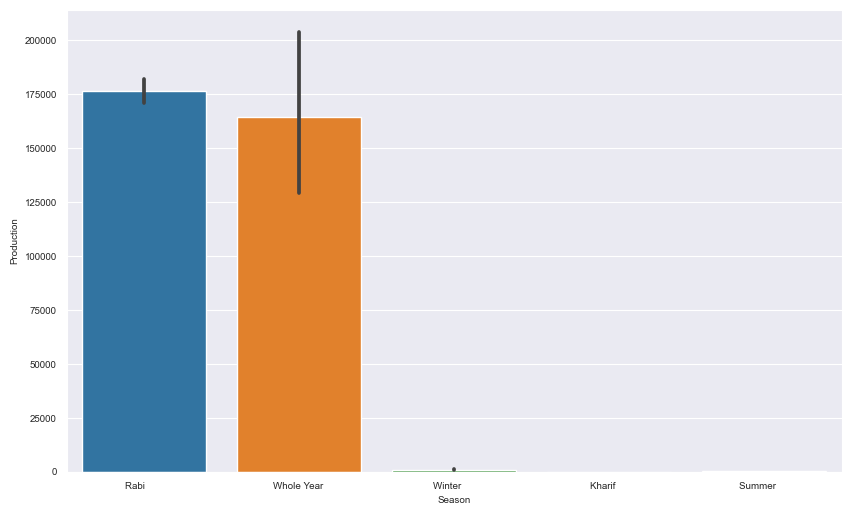

In [21]:
sns.barplot(x=wheat_data["Season"], y=wheat_data["Production"])

the above plot shows that the wheat production in Rabi season is more than Kharif season. The reason behind this is that the wheat is a Rabi crop and it is sown in the winter season. The major states producing wheat are Uttar Pradesh, Punjab, Haryana, Madhya Pradesh, Rajasthan, etc.

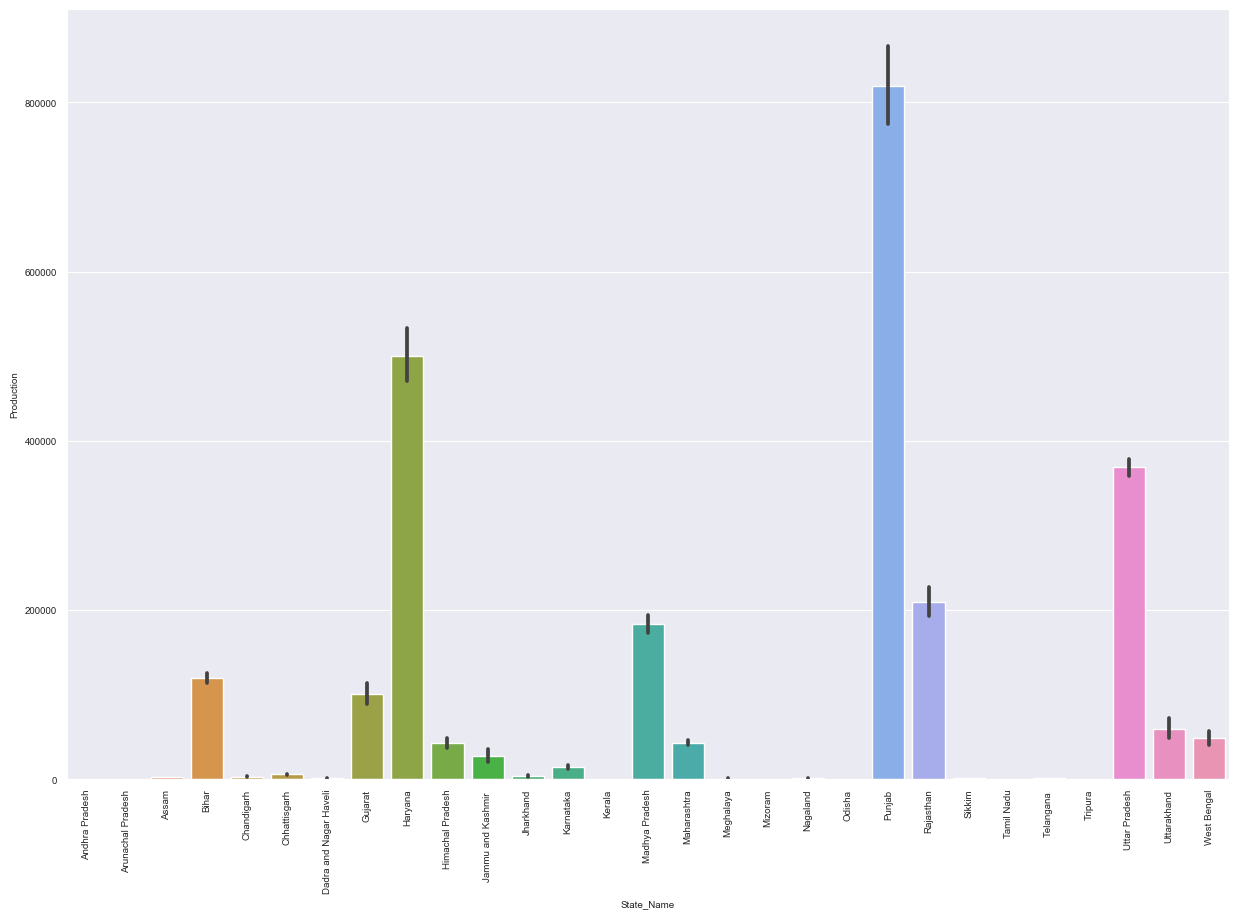

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(x=wheat_data["State_Name"], y=wheat_data["Production"])
plt.xticks(rotation=90)
plt.show()

Wheat production is highest in Punjab, followed by Uttar Pradesh, Haryana, Madhya Pradesh, Rajasthan, etc.

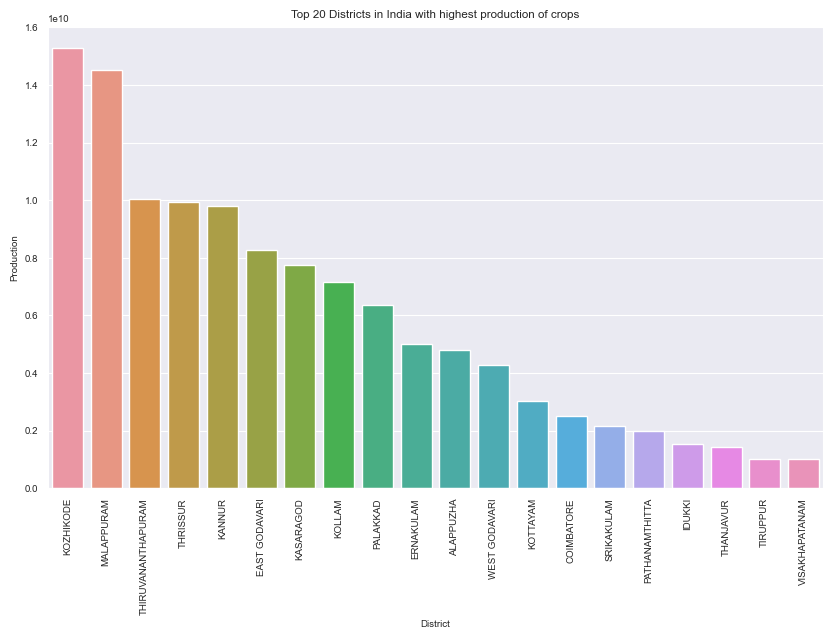

In [24]:
district_production=data.groupby("District_Name")["Production"].sum()
sorted_districts=district_production.sort_values(ascending=False)
top_20_district=sorted_districts[:20]

top_20_data_wheat=pd.DataFrame({'district':top_20_district.index,'production':top_20_district.values})
sns.barplot(x='district',y='production',data=top_20_data_wheat)
plt.xticks(rotation=90)

plt.xlabel('District')
plt.ylabel('Production')
plt.title('Top 20 Districts in India with highest production of crops')
plt.show()

State:
1.Punjab:Districts with highest production of wheat are Ludhiana, Bathinda, Sangrur, Amritsar,Bathinda, Firozpur, Jalandhar, Patiala, etc.

Possible reasons for high production of wheat in Punjab are:
1. Punjab has fertile land.
2. Punjab has well developed irrigation system.
3. Punjab has well developed market system.
4. Punjab has well developed transportation system.
5. Punjab has well developed storage system.
6. Punjab has well developed agricultural research system.

2.Uttar Pradesh: Districts with highest production of wheat are Meerut, Muzaffarnagar, Baghpat, Saharanpur, Shamli, etc.

Possible reasons for high production of wheat in Uttar Pradesh are:
1. Uttar Pradesh has fertile land.
2. Uttar Pradesh has well developed irrigation system.
3. Uttar Pradesh has well developed market system.
4. agricultural research system.

3.Haryana: Districts with highest production of wheat is Sirsa.

Possible reasons for high production of wheat in Haryana are:
1. Haryana has fertile land.
2. Haryana has well developed irrigation system.
3. Haryana has favourable climatic conditions.